<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%202/Exerc%C3%ADcio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando o processo de limiarização, usado como base para mapeamento de cores em processamento de imagens coloridas,  esta questão usa a imagem da lua que pode ser obtida aqui: https://github.com/kevinruiz182/image_processing_tools/blob/main/images/spatial/moon.jpg:
Some os 3 canais da imagem original, depois normalize o resultado pela função abaixo e então divida a saída por 255:

normalizar = lambda v: (255*(v- v.min())/(v.max() - v.min())).astype(int)
Desse modo, a saída terá apenas um canal. Faça então a seguinte aproximação:

Se um pixel tiver valor inferior a 0.25, modifique-o para 0

Se um pixel não tiver valor inferior a 0.25 e for menor que 0.5, modifique-o para 0.25

Se um pixel não tiver valor inferior a 0.5  e  for menor que 0.75, modifique-o para 0.5

Se um pixel não tiver valor inferior a 0.75, modifique-o para 1.

Através do método imshow da bilbioteca matplotlib, deverá ser obtido algo semelhante à imagem que encontra-se abaixo com regiões segmentadas. Finalmente, calcule o valor da média dos pixels sobre toda a imagem e selecione nas opções abaixo o valor mais próximo:

In [1]:
import os
if os.path.isdir("imgcourse"):
  print("Diretório já existe!")
else:
  !git clone https://github.com/kevinruiz182/image_processing_tools/


Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (15/15), done.


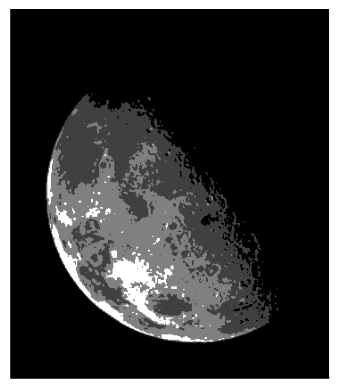

0.13159378460918886

In [2]:
# Importando as bibliotecas necessárias
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
img_path = '/content/image_processing_tools/images/spatial/moon.jpg'
img = Image.open(img_path)

# Converter a imagem para o espaço de cores RGB e obter os canais
img_rgb = img.convert('RGB')
r, g, b = img_rgb.split()

# Converter os canais para arrays numpy e somá-los
r_array = np.array(r, dtype=np.float32)
g_array = np.array(g, dtype=np.float32)
b_array = np.array(b, dtype=np.float32)
summed_array = r_array + g_array + b_array

# Normalizar o resultado pela função dada
normalizar = lambda v: (255*(v - v.min()) / (v.max() - v.min())).astype(int)
normalized_array = normalizar(summed_array) / 255.0

# Aplicar a limiarização com as condições dadas
thresholded_array = np.zeros_like(normalized_array)
thresholded_array[normalized_array < 0.25] = 0
thresholded_array[(normalized_array >= 0.25) & (normalized_array < 0.5)] = 0.25
thresholded_array[(normalized_array >= 0.5) & (normalized_array < 0.75)] = 0.5
thresholded_array[normalized_array >= 0.75] = 1.0

# Calcular o valor da média dos pixels sobre toda a imagem
mean_pixel_value = thresholded_array.mean()

# Mostrar a imagem segmentada
plt.imshow(thresholded_array, cmap='gray')
plt.axis('off')  # Não mostrar os eixos
plt.show()

mean_pixel_value
